### Problem statement
Clustering: K-Means

Dataset : Social_Network_Ads.csv

Apply Data pre-processing (Label Encoding , Data Transformation....)
techniques if necessary.

Apply K-Means clustering algorithms (based on EstimatedSalary
column) to find the group of users.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# create x-array
x = df.iloc[:, [2,3]].values

In [6]:
x.shape

(400, 2)

In [7]:
# creating y array
y = df.iloc[:,4].values

In [8]:
y.shape

(400,)

### Split the data into train test split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [10]:
print("Training Set of X:", len(x_train))
print("Testing Set of X:", len(x_test))
print("Training Set of y:", len(y_train))
print("Testing Set of y:", len(y_test))

Training Set of X: 280
Testing Set of X: 120
Training Set of y: 280
Testing Set of y: 120


### Feature Scaling
- Feature scaling is a technique used to normalize the range of independent variables or features of data. 
- This is done by transforming the data so that all features have a mean of 0 and a standard deviation of 1. 
- Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x_train = sc.fit_transform(x_train)

In [14]:
x_test = sc.fit_transform(x_test)

### Determining the number of clusters 

##### Elbow method
- Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
- We will use 'random' initialization method for this study.

In [15]:
cluster_score = []
# might take some time
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(x)
    cluster_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Clustering score')

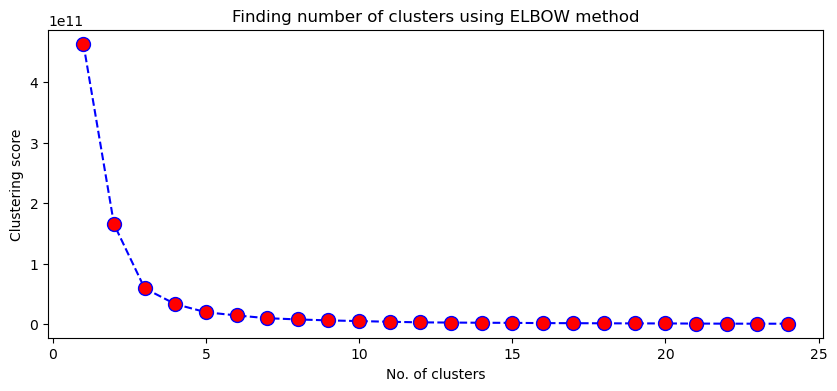

In [16]:
plt.figure(figsize=(10,4))
plt.plot(range(1,25),cluster_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Finding number of clusters using ELBOW method')
plt.xlabel('No. of clusters')
plt.ylabel('Clustering score')

from above elbow method, it is clear that clustering score slows down after 3 clusters so take number of clusters K = 3 for further analysis.

### Compute K means clustering
Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)

#compute k-means clustering
kmeans.fit(x)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(x)

pred

array([2, 2, 0, 0, 3, 0, 3, 1, 2, 0, 3, 0, 3, 2, 3, 3, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 3, 1, 2, 0, 3, 2, 2, 0, 3, 2, 2, 0, 1, 2,
       3, 2, 3, 0, 1, 3, 2, 0, 3, 2, 0, 0, 0, 3, 2, 1, 2, 3, 0, 1, 3, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 2, 1, 0, 2, 3, 2, 3, 0, 0, 3, 0, 1, 0, 3,
       3, 0, 3, 1, 2, 2, 3, 0, 2, 1, 3, 2, 3, 0, 3, 1, 2, 3, 2, 3, 3, 3,
       3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 2, 2, 3, 0, 2,
       3, 3, 0, 0, 3, 1, 0, 2, 3, 3, 0, 3, 2, 3, 3, 2, 0, 3, 2, 0, 3, 0,
       0, 2, 0, 3, 2, 1, 3, 3, 2, 2, 3, 3, 0, 3, 1, 0, 3, 1, 1, 0, 3, 2,
       0, 2, 2, 2, 2, 3, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 0, 3, 3, 0, 3, 2,
       3, 2, 2, 3, 1, 3, 3, 0, 1, 1, 1, 2, 3, 1, 0, 0, 0, 1, 0, 3, 3, 1,
       3, 3, 1, 3, 0, 0, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 1, 0,
       3, 1, 3, 1, 0, 1, 0, 3, 2, 0, 1, 1, 0, 3, 3, 0, 3, 1, 3, 1, 1, 3,
       3, 1, 3, 3, 1, 0, 1, 3, 0, 1, 2, 3, 3, 3, 2, 2, 3, 0, 3, 2, 1, 3,
       0, 1, 3, 3, 1, 3, 2, 3, 0, 0, 3, 1, 3, 1, 2,

'pred' contains the values index( 0 to 2) cluster for every training example. Let's add it to original dataset for better understanding.

In [18]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 3    134
0    108
2     87
1     71
Name: Cluster, dtype: int64


,User ID,Gender,Age,EstimatedSalary,Purchased,Cluster
0,15624510,Male,19,19000,0,2
1,15810944,Male,35,20000,0,2
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,3
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,2
397,15654296,Female,50,20000,1,2
398,15755018,Male,36,33000,0,2


### Visualization
Let's plot the centroid and cluster with different colors to visualize, how K-Means algorithm has grouped the data.

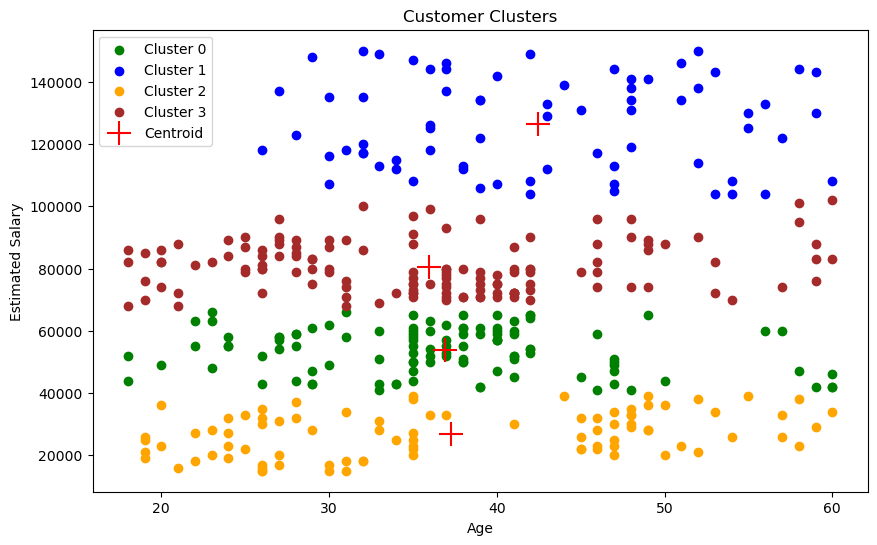

In [19]:
# Assuming x contains Age and EstimatedSalary columns
x = df[['Age', 'EstimatedSalary']].values
pred = df['Cluster'].values  # Assuming 'Cluster' column contains the predicted labels

plt.figure(figsize=(10, 6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], marker='o', c='green', label='Cluster 0')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], marker='o', c='blue', label='Cluster 1')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], marker='o', c='orange', label='Cluster 2')
plt.scatter(x[pred == 3, 0], x[pred == 3, 1], marker='o', c='brown', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroid', marker='+')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Customer Clusters')
plt.show()
